In [70]:
##import the libraries

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
## load the dataset

In [ ]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
## basic informrmatin about the dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
## check missing value & duplicates

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(1081)

In [ ]:
df=df.drop_duplicates()

In [ ]:
## EDA

In [ ]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

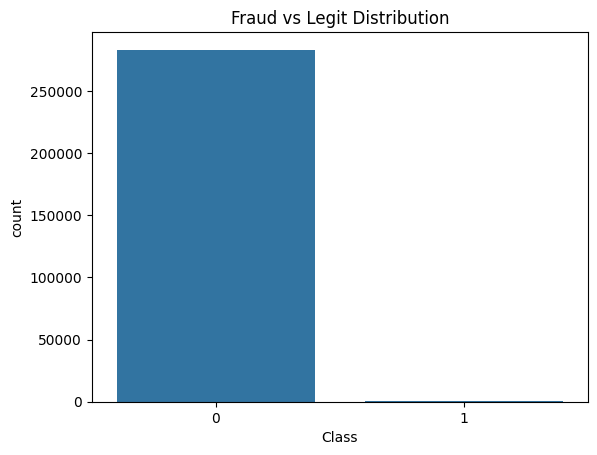

In [ ]:
sns.countplot(x="Class",data=df)
plt.title("Fraud vs Legit Distribution")
plt.show()

In [ ]:
## correlation Heatmap

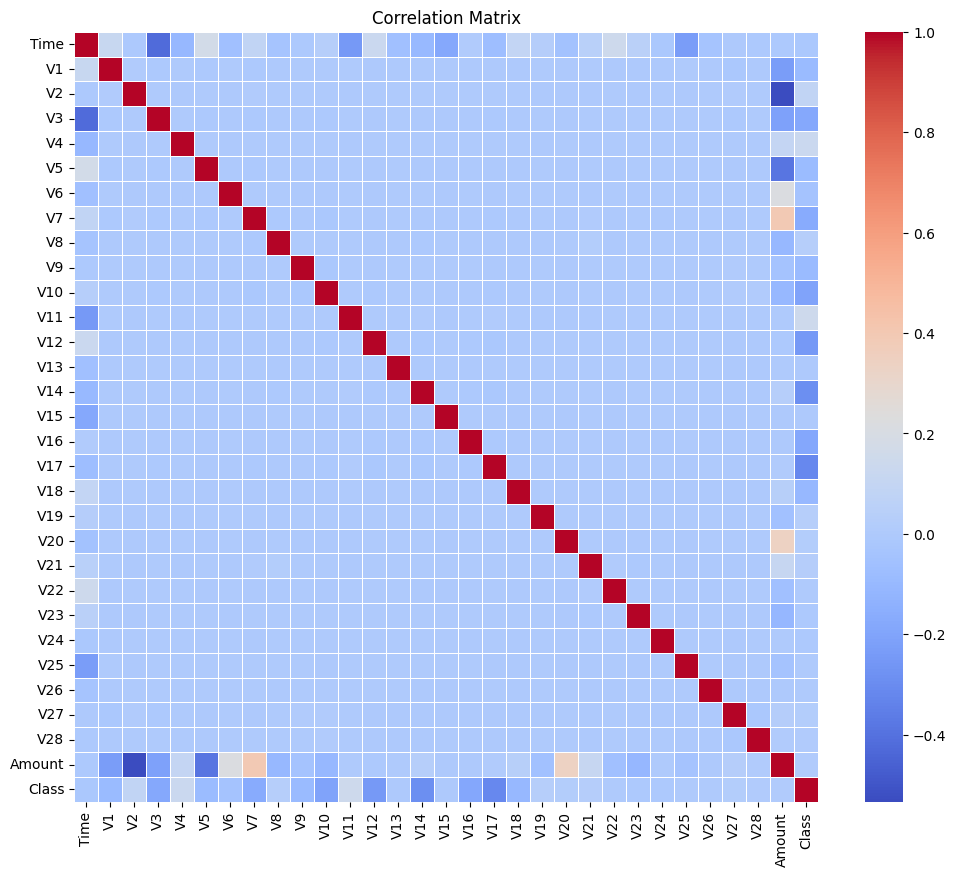

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix")
plt.show()


In [ ]:
## Feature/Target_split

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [ ]:
X,y

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V20       V21  \
 0       0.462388  0.239599  0.098698  0.36378

In [ ]:
## Feature Scaling

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [ ]:
## Handle Imbalance (SMOTE)

In [ ]:
print("Before SMOTE:")
print(y.value_counts())


Before SMOTE:
Class
0    283253
1       473
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X_scaled, y)


In [ ]:
print("After SMOTE:")
print(pd.Series(y_res).value_counts())


After SMOTE:
Class
0    283253
1    283253
Name: count, dtype: int64


In [ ]:
## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size=0.2,
    random_state=42
)


In [ ]:
## Train Logistic REgression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]


In [ ]:
## Train Random Forest

In [ ]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=12,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
## Train XGBoost

In [ ]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]


In [ ]:
## Evaluation function

In [ ]:
def evaluate_model(name, y_test, y_pred, y_prob):
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print(f"---- {name} ----")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("ROC-AUC:", roc)
    print()


In [ ]:
## Evaluate All models

In [ ]:
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)

evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)


---- Logistic Regression ----
Accuracy: 0.9462586715150659
Precision: 0.9724973931178311
Recall: 0.918858530234522
F1: 0.9449173624743312
ROC-AUC: 0.9891304499321923

---- Random Forest ----
Accuracy: 0.9944396391943655
Precision: 0.9990943154978601
Recall: 0.9898133323950105
F1: 0.9944321696862571
ROC-AUC: 0.9998975991795087

---- XGBoost ----
Accuracy: 0.9995675274928951
Precision: 0.9991562071511444
Recall: 0.9999824064462781
F1: 0.9995691360738624
ROC-AUC: 0.9999843451865373



In [ ]:
models = {
    "LR": (lr, roc_auc_score(y_test, y_prob_lr)),
    "RF": (rf, roc_auc_score(y_test, y_prob_rf)),
    "XGB": (xgb, roc_auc_score(y_test, y_prob_xgb))
}

best = max(models, key=lambda x: models[x][1])

best


'XGB'

In [ ]:
## save model

In [ ]:
best_model = models[best][0]

best_model.save_model("fraud_model.json")
joblib.dump(scaler, "scaler.pkl")
print("Model Saved!")


Model Saved!


In [ ]:
## test prediction


In [72]:
sample = X.iloc[0:1]

sample_scaled = scaler.transform(sample)

pred = best_model.predict(sample_scaled)
prob = best_model.predict_proba(sample_scaled)

pred, prob


(array([0]), array([[9.994706e-01, 5.293836e-04]], dtype=float32))

In [ ]:
import sys
print(sys.executable)


c:\Users\ARIF RAZA\anaconda3\envs\project\python.exe
